In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
icon_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [2]:
def load_image_batch(batch_id):
    path = r"./cifar-10-batches/data_batch_"
    with open(path+str(batch_id), mode="rb") as file:
        batch = pickle.load(file, encoding="ISO-8859-1") #打开文件，还原到对象
        labels = batch['labels']
        features = batch["data"].reshape(len(batch["data"]),3,32,32).transpose(0,2,3,1)
        return labels, features

In [3]:
labels, images = load_image_batch(1)

In [4]:
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


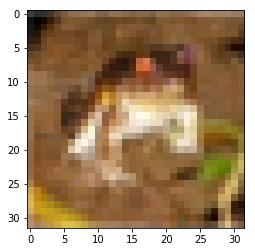

In [5]:
plt.imshow(images[0])

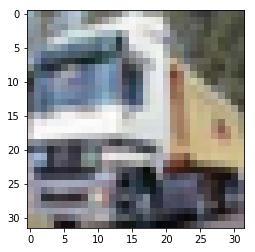

In [6]:
plt.imshow(images[1])

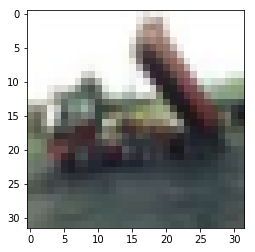

In [7]:
plt.imshow(images[2])

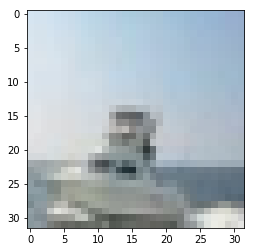

In [8]:
plt.imshow(images[100])

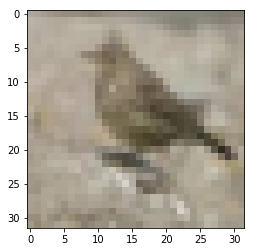

In [9]:
plt.imshow(images[120])

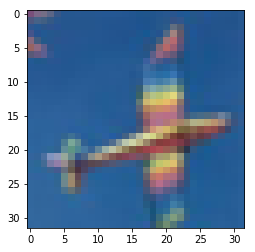

In [10]:
plt.imshow(images[220])

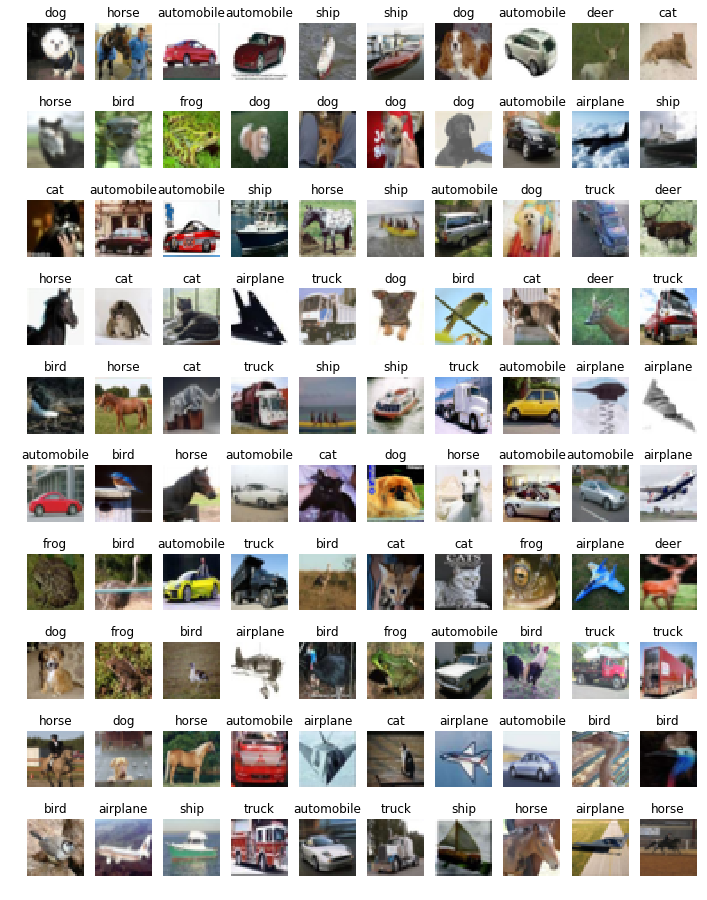

In [11]:
plt.figure(figsize=(12,16))
for i in range(100): #显示100张图片
    plt.subplot(10,10,i+1)
    index = np.random.randint(10000,size=1)[0] #随机数
    plt.imshow(images[index]) #显示图片
    plt.title(icon_name[labels[index]]) #显示名称
    plt.axis("off")

In [12]:
global labelslast, imageslast #声明全局变量
labelslast, imageslast = load_image_batch(1) #初始化

In [13]:
for i in range(2, 6):
    label, data = load_image_batch(i)
    imageslast = np.concatenate([imageslast, data])
    labelslast = np.concatenate([labelslast, label]) #数据整合

In [14]:
type(labelslast)

numpy.ndarray

In [15]:
type(imageslast)

numpy.ndarray

In [16]:
display(len(labelslast), imageslast.shape)

50000

(50000, 32, 32, 3)

In [17]:
display(labelslast.shape, imageslast.shape)

(50000,)

(50000, 32, 32, 3)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(imageslast, labelslast, train_size=0.85)

e:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
x_train.shape

(42500, 32, 32, 3)

In [22]:
x_train = x_train.reshape(42500,3072)

In [23]:
x_test.shape

(7500, 32, 32, 3)

In [24]:
x_test = x_test.reshape(7500,3072)

In [ ]:
from sklearn.svm import SVC #分类
from sklearn.decomposition import PCA #降维
svc = SVC()
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(x_train) #降维
x_train_pca = pca.transform(x_train) #训练的数据转换
x_test_pca = pca.transform(x_test) #测试的数据转换
svc.fit(x_train_pca, y_train) #训练
svc.score(x_test_pca, y_test) #评分

In [ ]:
type(svc)

In [ ]:
x_test.shape

In [ ]:
images.shape

In [ ]:
plt.imshow(images[100])

In [ ]:
plt.imshow(x_test[100].reshape(32, 32, 3))

In [ ]:
y_new = svc.predict(x_test_pca)
type(y_new)

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(1, 101):
    plt.plot(10,10,i)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.title("%s\n%s" %(icon_name[y_new[i]], icon_name[y_test[i]]))
    plt.tight_layout()
    plt.axis("off")

In [6]:
import numpy as np
import os
import pickle
import glob
import matplotlib.pyplot as plt

data_dir = "G:\python\jupyter\machine_learning\image_identify"
data_dir_cifar10 = os.path.join(data_dir, "cifar-10-batches")
data_dir_cifar100 = os.path.join(data_dir, "cifar-100-python")
class_names_cifar10 = np.load(os.path.join(data_dir_cifar10, "batches.meta"))
class_names_cifar100 = np.load(os.path.join(data_dir_cifar100, "meta"))

def one_hot(x, n):
    """
    convert index representation to one-hot representation
    """
    x = np.array(x)
    assert x.ndim == 1
    return np.eye(n)[x]

def _load_batch_cifar10(filename, dtype='float64'):
    """
    load a batch in the CIFAR-10 format
    """
    path = os.path.join(data_dir_cifar10, filename)
    batch = np.load(path)
    data = batch['data'] / 255.0 # scale between [0, 1]
    labels = one_hot(batch['labels'], n=10) # convert labels to one-hot representation
    return data.astype(dtype), labels.astype(dtype)

def _grayscale(a):
    print(a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1))
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

def cifar10(dtype='float64', grayscale=True):
    # train
    x_train = []
    t_train = []
    for k in range(5):
        x, t = _load_batch_cifar10("data_batch_%d" % (k + 1), dtype=dtype)
        x_train.append(x)
        t_train.append(t)
    x_train = np.concatenate(x_train, axis=0)
    t_train = np.concatenate(t_train, axis=0)
    # test
    x_test, t_test = _load_batch_cifar10("test_batch", dtype=dtype)
    if grayscale:
        x_train = _grayscale(x_train)
        x_test = _grayscale(x_test)
    return x_train, t_train, x_test, t_test

def _load_batch_cifar100(filename, dtype='float64'):
    """
    load a batch in the CIFAR-100 format
    """
    path = os.path.join(data_dir_cifar100, filename)
    batch = np.load(path)
    data = batch['data'] / 255.0
    labels = one_hot(batch['fine_labels'], n=100)
    return data.astype(dtype), labels.astype(dtype)

def cifar100(dtype='float64', grayscale=True):
    x_train, t_train = _load_batch_cifar100("train", dtype=dtype)
    x_test, t_test = _load_batch_cifar100("test", dtype=dtype)
    if grayscale:
        x_train = _grayscale(x_train)
        x_test = _grayscale(x_test)
    return x_train, t_train, x_test, t_test

Xtrain, Ytrain, Xtest, Ytest = cifar10()
################################################
# 图像样本显示
image = Xtrain[0].reshape(32, 32)
image1 = Xtrain[255].reshape(32, 32)
fig = plt.figure()
ax = fig.add_subplot(121)
plt.axis('off')
plt.title(class_names_cifar10['label_names'][list(Ytrain[0]).index(1)])
plt.imshow(image, cmap='gray')
ax = fig.add_subplot(122)
plt.title(class_names_cifar10['label_names'][list(Ytrain[255]).index(1)])
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

OSError: Failed to interpret file 'G:\\python\\jupyter\\machine_learning\\image_identify\\cifar-10-batches\\data_batch_1' as a pickle